<a href="https://colab.research.google.com/github/EpicMike87/AIProject/blob/main/bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
!pip install tensorflow==2.14.1 stable-baselines3 gym-anytrading gym sb3_contrib

In [229]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sb3_contrib import RecurrentPPO
from stable_baselines3.common.evaluation import evaluate_policy

In [230]:
from google.colab import drive
drive.mount('/content/drive')
%ls
%cd drive
%ls
%cd My \Drive
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 20180629_155959.jpg
 549271.pdf
 551375_eticket.pdf
 a5leaflet_CS.pdf
'Alternative Dates Form 20122013.docx.gdoc'
'Application Form November 2011 (2).doc'
'Application Pack.doc'
'Application - Sean Laughlin.gdoc'
 Application-SeanLaughlin.gdoc
'Bank Details Form.gdoc'
 christophersingleton.doc
'Colab Notebooks'/
'Components (1).docx.gdoc'
 Components.docx.gdoc
'Contract of employment Sean Laughlin.doc'
'Copy of Copy of Wonderland Staking and Minting Calculator (4,4).gsheet'
'Copy of Year of Industry draft 2012.doc.gdoc'
 coverphoto2.png
 coverphoto.png
'CV Grameen January 2016 (1).gdoc'
'CV Grameen January 2016 (2).gdoc'
'CV Grameen January 2016 (3).gdoc'
'CV Grameen January 2016 (4).gdoc'
'CV Grameen January 2016.doc'
'CV Grameen January 2016.gdoc'
 C.V.rtf
 cv_seanlaughlin.doc
 DAN175991.pdf
 data/
 Directions_to_Citypoint.pdf
'Facebook page 3.pptx'
'Faceb

In [231]:
df = pd.read_json('data/updated_spy_data.json')

In [232]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,volume,high,low,open,close,stochastic_k,stochastic_d,macd_line,signal_line,macd_histogram,momentum
0,2023-11-14 16:40:00,1522670.0,449.470001,449.140015,449.179993,449.450012,70.212973,63.407454,0.233621,0.246319,-0.012698,0.300018
1,2023-11-14 16:45:00,1569962.0,449.589996,449.000000,449.450104,449.111206,34.169859,49.915071,0.205815,0.238203,-0.032388,0.151215
2,2023-11-14 16:50:00,890765.0,449.140015,448.670013,449.119995,448.885010,20.282720,41.555184,0.165421,0.223624,-0.058203,-0.354584
3,2023-11-14 16:55:00,631308.0,448.885010,448.399994,448.869995,448.434998,2.631820,19.028133,0.099282,0.198725,-0.099443,-0.765015
4,2023-11-14 17:00:00,705646.0,448.720001,448.359985,448.439697,448.559998,14.599158,12.504566,0.055618,0.170075,-0.114457,-1.135010


In [233]:
df['Date'] = pd.to_datetime(df['timestamp'])
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


timestamp         datetime64[ns]
volume                   float64
high                     float64
low                      float64
open                     float64
close                    float64
stochastic_k             float64
stochastic_d             float64
macd_line                float64
signal_line              float64
macd_histogram           float64
momentum                 float64
Date              datetime64[ns]
dtype: object

In [234]:
df.drop(columns=['timestamp'], inplace=True)
df.drop(columns=['stochastic_k'], inplace=True)
df.drop(columns=['stochastic_d'], inplace=True)
df.drop(columns=['macd_line'], inplace=True)
df.drop(columns=['signal_line'], inplace=True)
df.drop(columns=['macd_histogram'], inplace=True)
df.drop(columns=['momentum'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,volume,high,low,open,close,Date
0,1522670.0,449.470001,449.140015,449.179993,449.450012,2023-11-14 16:40:00
1,1569962.0,449.589996,449.000000,449.450104,449.111206,2023-11-14 16:45:00
2,890765.0,449.140015,448.670013,449.119995,448.885010,2023-11-14 16:50:00
3,631308.0,448.885010,448.399994,448.869995,448.434998,2023-11-14 16:55:00
4,705646.0,448.720001,448.359985,448.439697,448.559998,2023-11-14 17:00:00
...,...,...,...,...,...,...
4614,888024.0,501.070007,500.850006,500.880005,500.945007,2024-02-09 20:35:00
4615,736411.0,501.049988,500.779999,500.940002,500.795013,2024-02-09 20:40:00
4616,868149.0,500.910004,500.730011,500.790009,500.744995,2024-02-09 20:45:00
4617,2267935.0,501.149994,500.690002,500.739990,500.975006,2024-02-09 20:50:00


In [236]:
df.set_index('Date', inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,volume,high,low,open,close
Date,,,,,
2023-11-14 16:40:00,1522670.0,449.470001,449.140015,449.179993,449.450012
2023-11-14 16:45:00,1569962.0,449.589996,449.000000,449.450104,449.111206
2023-11-14 16:50:00,890765.0,449.140015,448.670013,449.119995,448.885010
2023-11-14 16:55:00,631308.0,448.885010,448.399994,448.869995,448.434998
2023-11-14 17:00:00,705646.0,448.720001,448.359985,448.439697,448.559998


In [237]:
df.rename(columns={'close': 'Close'}, inplace=True)
df.rename(columns={'open': 'Open'}, inplace=True)
df.rename(columns={'low': 'Low'}, inplace=True)
df.rename(columns={'high': 'High'}, inplace=True)
df.rename(columns={'volume': 'Volume'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
env = gym.make('stocks-v0', df=df, frame_bound=(100,3000), window_size=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
env.signal_features

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 4.4945001e+02,  0.0000000e+00],
       [ 4.4911121e+02, -3.3880615e-01],
       [ 4.4888501e+02, -2.2619629e-01],
       ...,
       [ 4.7397000e+02, -4.7000122e-01],
       [ 4.7398999e+02,  1.9989014e-02],
       [ 4.7389999e+02, -8.9996338e-02]], dtype=float32)

In [240]:
env.action_space

Discrete(2)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


info {'total_reward': 7.586151123046875, 'total_profit': 1.5346656366753733e-05, 'position': <Positions.Long: 1>}


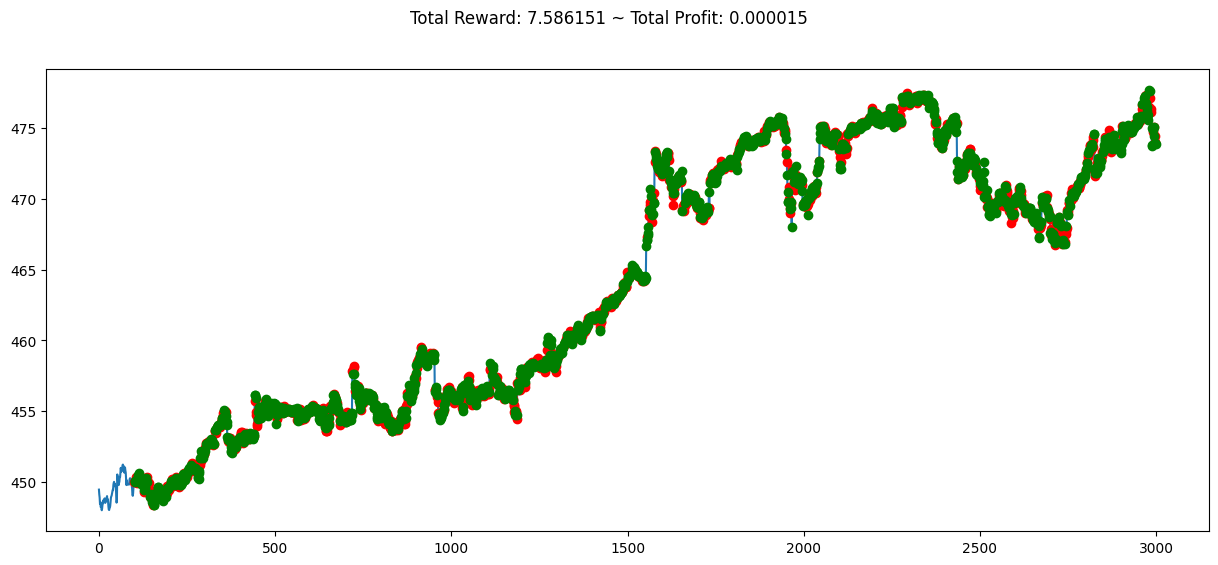

In [241]:
state = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated

    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [242]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(50,500), window_size=50)
env = DummyVecEnv([env_maker])

In [243]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 513      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.364   |
|    value_loss         | 0.289    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 487      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.215   |
|    value_loss      

KeyboardInterrupt: 

In [274]:
env = gym.make('stocks-v0', df=df, frame_bound=(2000, 2950), window_size=50)
obs = env.reset()
obs = obs[0]
prev_action = None
data_to_plot = []
while True:
    obs = obs[np.newaxis, ...]

    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    done = truncated or terminated

    if prev_action is not None and action == prev_action:
        # If the current action is the same as the previous one, skip adding data to the plot
        pass
    else:
        data_to_plot.append(obs)

    prev_action = action

    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all(data_to_plot)
plt.show()



info {'total_reward': 4.335906982421875, 'total_profit': 0.031109347987848084, 'position': <Positions.Long: 1>}


ValueError: Image size of 1218x473436 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x600 with 1 Axes>

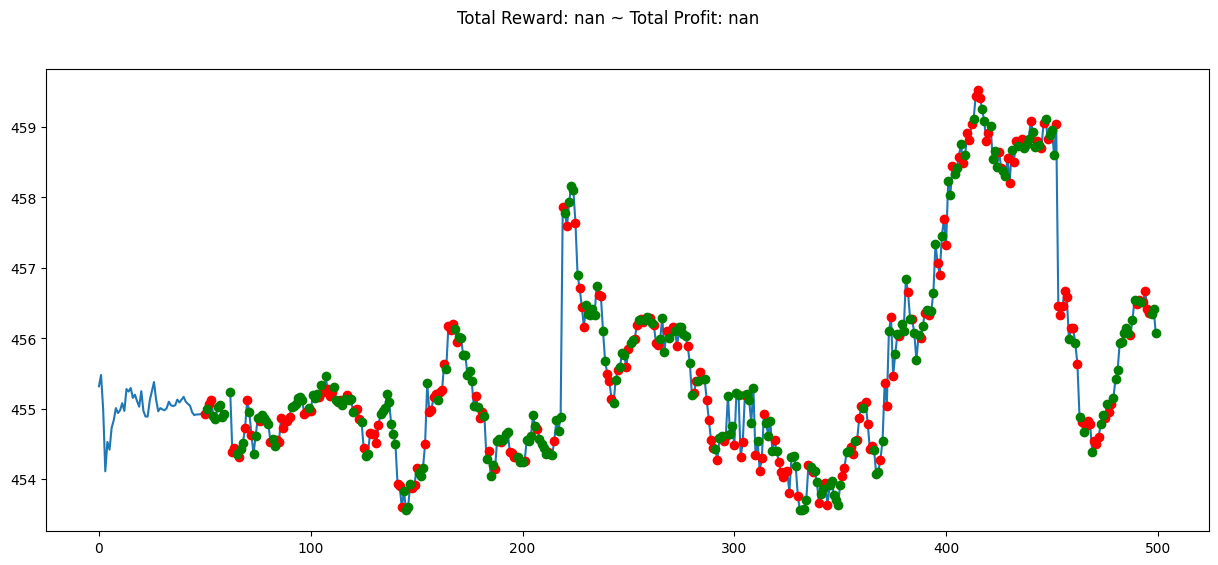

In [245]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()